# Convolution Neural Networks (CNNs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

## Black/White image in CNNs

A black-and-white (grayscale) image in a CNN is represented as a 2D array, where each number corresponds to the brightness (intensity) of a pixel.

+ **0** - completely black pixel
+ **255** - completely white pixel
+ $p_{ij} \in [0, 255]$ - various shades of gray, where lower values are darker and higher values are lighter.
+ The size of the tensor `(height, width, 1)` - 1 channel, brightness (from 0 to 255)

In [2]:
# random b/w image
grayscale_image = np.random.randint(0, 255, (4, 4))

In [3]:
# 2D tensor
print(grayscale_image)

[[  5  67  44  83]
 [200 216   0  17]
 [234 237 167  62]
 [102  92  36 233]]


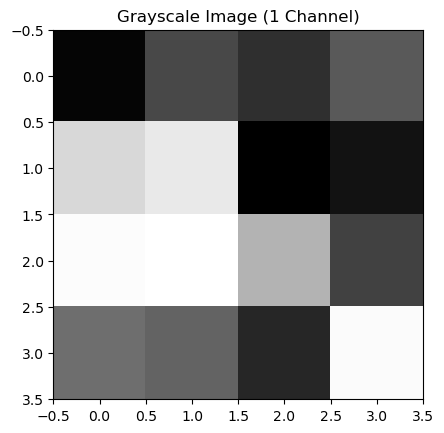

In [4]:
# show B/W image
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image (1 Channel)")
plt.show()

## RGB image in CNNs

RGB (Red, Green, Blue) refers to the three-channel representation of a color image. Unlike grayscale images, where each pixel has only one intensity value, RGB images store three values per pixel, corresponding to red, green, and blue color intensities.

A **tensor** in CNN represents an **RGB image** as a **3D array**, where:

- **Indexes `(i, j)` represent the coordinates of a pixel** in the image.
- **Each pixel is represented by a tuple `(R, G, B)`, where:**
  - \( R \) (Red) → Intensity of the red channel.
  - \( G \) (Green) → Intensity of the green channel.
  - \( B \) (Blue) → Intensity of the blue channel.

This means that an **RGB image** is stored as a **3D tensor** with dimensions:

\[
(H, W, 3)
\]

- **\( H \)** → Image height (number of rows)
- **\( W \)** → Image width (number of columns)
- **\( 3 \)** → The three RGB color channels

Each pixel in the image has **three brightness values** corresponding to the **three color channels**.


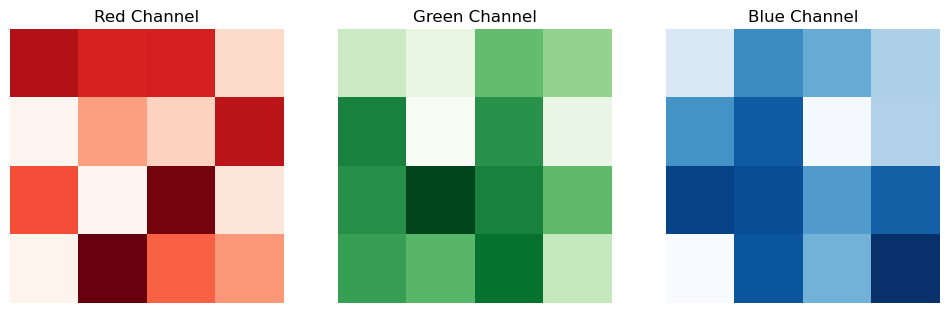

In [5]:
# random RGB image
color_image = np.random.randint(0, 255, (4, 4, 3), dtype=np.uint8)

# extract each channel
red_channel = color_image[:, :, 0]    # index of R channel = 0
green_channel = color_image[:, :, 1]  # index of G channel = 1
blue_channel = color_image[:, :, 2]   # index of B channel = 2

# plot each channel separately
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# red channel
ax[0].imshow(red_channel, cmap="Reds")  
ax[0].set_title("Red Channel")
ax[0].axis("off")

# green channel
ax[1].imshow(green_channel, cmap="Greens")  
ax[1].set_title("Green Channel")
ax[1].axis("off")

# blue channel
ax[2].imshow(blue_channel, cmap="Blues")  
ax[2].set_title("Blue Channel")
ax[2].axis("off")

plt.show()

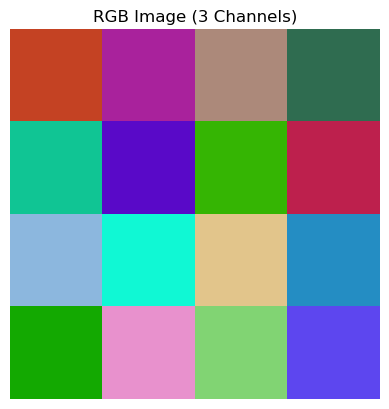

In [6]:
# plot RGB image
plt.imshow(color_image)
plt.title("RGB Image (3 Channels)")
plt.axis("off")
plt.show()

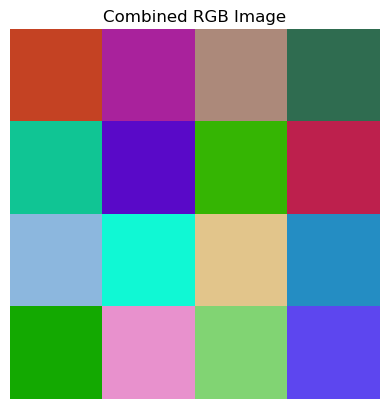

In [7]:
# combine 3 channels into one RGB
rgb_image = np.stack([red_channel, green_channel, blue_channel], axis=2)
plt.imshow(rgb_image)
plt.title("Combined RGB Image")
plt.axis("off")
plt.show()

In [8]:
red_channel

array([[196, 169, 172,  47],
       [ 16,  89,  53, 189],
       [140,  16, 226,  36],
       [ 19, 232, 129,  93]], dtype=uint8)

In [9]:
green_channel

array([[ 66,  34, 137, 108],
       [197,   9, 181,  32],
       [183, 248, 197, 141],
       [169, 145, 212,  70]], dtype=uint8)

In [10]:
blue_channel

array([[ 35, 156, 122,  80],
       [148, 200,   3,  77],
       [222, 212, 139, 195],
       [  1, 205, 115, 239]], dtype=uint8)

In [11]:
print(rgb_image)

[[[196  66  35]
  [169  34 156]
  [172 137 122]
  [ 47 108  80]]

 [[ 16 197 148]
  [ 89   9 200]
  [ 53 181   3]
  [189  32  77]]

 [[140 183 222]
  [ 16 248 212]
  [226 197 139]
  [ 36 141 195]]

 [[ 19 169   1]
  [232 145 205]
  [129 212 115]
  [ 93  70 239]]]


## Step-by-step

+ **Step 1.** Convolution Layer
+ **Step 2.** ReLU Layer
+ **Step 3.** Max Pooling Layer
+ **Step 4.** Flattering Layer
+ **Step 5.** Fully Connected Layer
+ **Step 6.** Output Layer

### Step 1. Convolution Layer

Convolution in CNN is an operation where a feature detector (filter) slides over an image and computes a **new feature map**.  

$$
S(i, j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} I(i+m, j+n) \cdot K(m, n)
$$

where:

+ $S(i, j)$ — value of the pixel in the output feature map.
+ $I(i+m, j+n)$ — input image.
+ $K(m, n)$ — feature detector of size $k \times k$.
+ $k$ — size of the feature detector (typically 3x3 or 5x5).
+ $i, j$ — pixel coordinates in the output feature map.
+ $m, n$ — coordinates inside the filter window.
    
Purpose of the convolution:
- Takes a fragment of the image of size $k \times k$.
- Performs element-wise multiplication of the fragment with the feature detector.
- Sums up all the resulting values.
- Writes the result into a new image.

**Size of feature map**

$$
\text{Output Size} = \frac{\text{(Input Size - Filter Size)}}{\text{Stride}} + 1
$$

where:
- $\text{Input Size}$ — size of the input image.
- $\text{Filter Size}$ — size of the filter.
- $\text{Stride}$ — how many pixels the filter shifts.

### Filters

#### Sharpen

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 0 & 0\\
0 & -1 & 5 & -1 & 0\\
0 & 0 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

#### Blur

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

#### Edge Enhance

$$
\begin{bmatrix}
0 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
$$

#### Edge Detect

$$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$$

#### Emboss

$$
\begin{bmatrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 \\
\end{bmatrix}
$$

### Step 2. ReUL Layer

#### Activation Functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_activation_function(name, func):
    plt.figure(figsize=(6, 4))
    x = np.linspace(-10, 10, 600)
    y = func(x)
    plt.scatter(x, y, label=name, color="blue", s=5)
    plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
    plt.title(f"{name} Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

#### ReLU activation function

$$
f(x) = max(0, x)
$$

+ If $x < 0$, them $f(x) = 0$
+ If $x \ge 0$, them $f(x) = x$

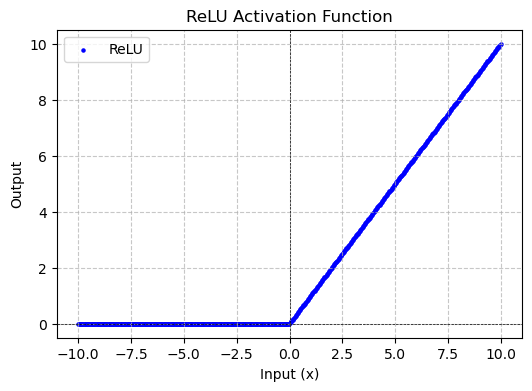

In [13]:
plot_activation_function("ReLU", lambda x: np.maximum(0, x))

#### Leaky ReLU activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & \alpha x, \space \text{if} \space x < 0  \\
      & x, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

+ Usually $\alpha = 0.01$

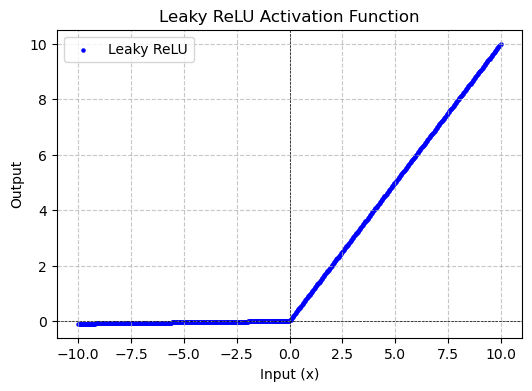

In [14]:
plot_activation_function("Leaky ReLU", lambda x: np.where(x > 0, x, x * 0.01))

### Step 3. Max Pooling

Max Pooling is a technique used in CNN to reduce the size of an image while keeping the most important information.

+ A small window (e.g., 2×2 or 3×3) moves over the image.
+ From each window, only the largest (maximum) value is kept.
+ This process shrinks the image, making it easier and faster to process while preserving key details.

### Step 4. Flattening Layer

Flattening is a step in CNNs that converts the multi-dimensional feature maps (output from convolutional and pooling layers) into a 1D vector to be used in the fully connected layer.

### Step 5. Fully Connected Layer

A Fully Connected Layer in a CNNs is a layer where every neuron is connected to every neuron in the previous and next layer. It is used to interpret extracted features and make final predictions.

+ Takes input from the Flattened Layer (a 1D vector of extracted features).
+ Each neuron is connected to all previous neurons, meaning it learns complex relationships between features.
+ Uses activation functions (e.g., ReLU, Softmax) to transform data and make predictions.

### Step 6. Output Layer

The Output Layer is the final layer in a CNN, responsible for making predictions based on the features extracted by previous layers.

#### Sigmoid activation function (2 classes)

$$
f(x) = \frac {1} {1 + e^{-x}}
$$

+ $f(x) \in [0, 1]$

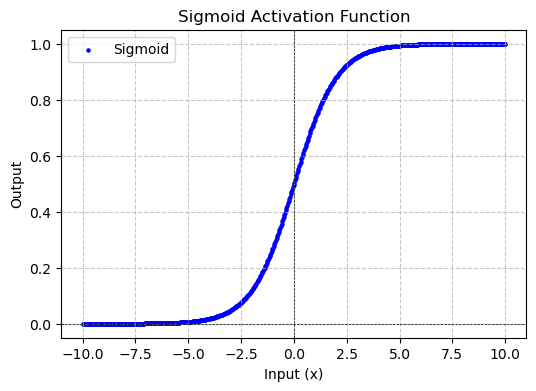

In [15]:
plot_activation_function("Sigmoid", lambda x: 1 / (1 + np.exp(-x)))

#### Softmax activation function (more than 2 classes)

$$
f(x_i) = \frac {e^{x_i}} {\sum_{j=1}^n e^{x_j}}
$$

+ $e^{x_i}$ is the exponential of the input value.
+ The denominator normalizes the values so that their sum equals 1.

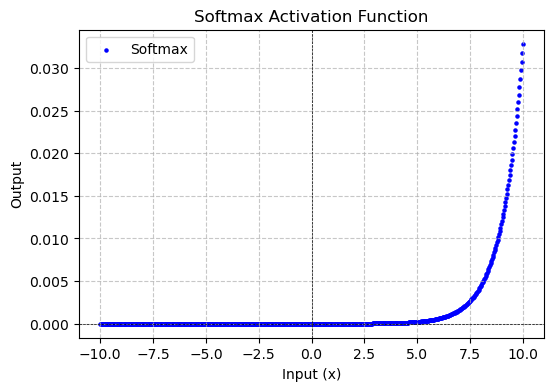

In [16]:
plot_activation_function("Softmax", lambda x: np.exp(x) / np.sum(np.exp(x)))

#### Cross-Entropy function

**Binary classification:**
$$
L = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

Where:  
- $y$ = true label (0 or 1).  
- $\hat{y}$ = predicted probability of class 1 (range: 0 to 1).  
- $log$ = natural logarithm.

**Multi-class classification:**

$$
L = - \sum_{i=1}^{N} y_i \log(\hat{y_i})
$$

Where:  
- $N$ = number of classes.  
- $y_i$ = true label (1 for the correct class, 0 otherwise).  
- $\hat{y_i}$ = predicted probability for class $i$ (output from Softmax).  


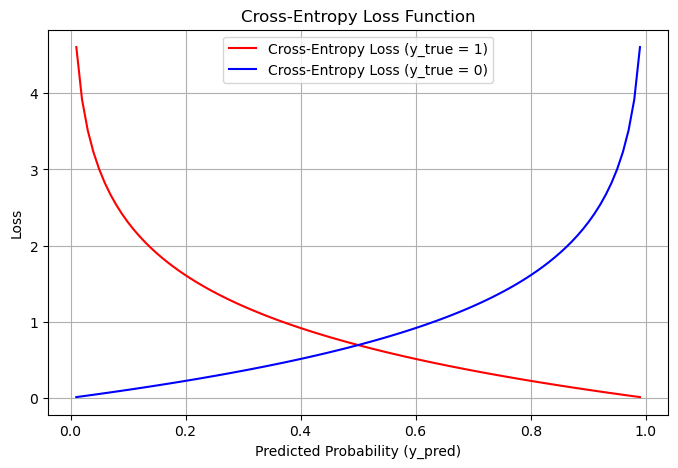

In [17]:
# Cross-entropy loss function for binary classification
def cross_entropy_loss(y_true, y_pred):
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Generate values for prediction probabilities (y_pred)
y_pred = np.linspace(0.01, 0.99, 100)  # Avoiding exact 0 and 1 to prevent log(0) issues

# Compute loss for y_true = 1 and y_true = 0
loss_y1 = cross_entropy_loss(1, y_pred)
loss_y0 = cross_entropy_loss(0, y_pred)

# Plot Cross-Entropy Loss
plt.figure(figsize=(8, 5))
plt.plot(y_pred, loss_y1, label="Cross-Entropy Loss (y_true = 1)", color="red")
plt.plot(y_pred, loss_y0, label="Cross-Entropy Loss (y_true = 0)", color="blue")
plt.xlabel("Predicted Probability (y_pred)")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss Function")
plt.legend()
plt.grid()
plt.show()


## Dataset

The full dataset is available [here](https://drive.google.com/file/d/1v2hL8Vz0w0d12HmHWoOL3m2bp75W1R6M/view?usp=sharing).

In [18]:
%ls ./00_data/dataset/

test_set/     training_set/


## `tensorflow` library

In [19]:
import tensorflow as tf

tf.__version__

2025-03-03 13:47:24.181694: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.17.0'

In [20]:
SEED = 42

In [21]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# training set
train_dataset = image_dataset_from_directory(
    "./00_data/dataset/training_set",
    labels="inferred",
    image_size=(64, 64),
    batch_size=32,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="training",
    seed=SEED
)
# validation set
val_dataset = image_dataset_from_directory(
    "./00_data/dataset/training_set",
    labels="inferred",
    image_size=(64, 64),
    batch_size=32,
    label_mode="int",
    shuffle=True,
    validation_split=0.25,
    subset="validation",
    seed=SEED
)
# test set
test_dataset = image_dataset_from_directory(
    "./00_data/dataset/test_set",
    labels="inferred",
    image_size=(64, 64),
    batch_size=32,
    label_mode="int",
    shuffle=True
)

Found 8001 files belonging to 2 classes.
Using 6001 files for training.
Found 8001 files belonging to 2 classes.
Using 2000 files for validation.
Found 2001 files belonging to 2 classes.


In [22]:
train_dataset.class_names

['cats', 'dogs']

## Building the CNN

In [23]:
# init CNN
cnn = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 3)), # Step 1. Convolution
    tf.keras.layers.ReLU(), # Step 2. ReLU/Leaky ReLU
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # Step 3. Max Pooling
    tf.keras.layers.Conv2D(filters=64, kernel_size=3), # second convolition
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3), # third convolition
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(), # Step 4. Flattering
    tf.keras.layers.Dense(256), # Step 5.
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(1, activation='sigmoid') # Step 6. Output layer
])

In [24]:
# compiling the CNN
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
# training the CNN
history = cnn.fit(x = train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.5131 - loss: 0.6982 - val_accuracy: 0.5215 - val_loss: 0.6862
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.5592 - loss: 0.6819 - val_accuracy: 0.6620 - val_loss: 0.6322
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.6273 - loss: 0.6428 - val_accuracy: 0.6935 - val_loss: 0.5885
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.6520 - loss: 0.6214 - val_accuracy: 0.6760 - val_loss: 0.6003
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.6497 - loss: 0.6181 - val_accuracy: 0.6850 - val_loss: 0.5879
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.6978 - loss: 0.5787 - val_accuracy: 0.7345 - val_loss: 0.5483
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.7084 - loss: 0.5699 - val_accuracy: 0.7440 - val_loss: 0.5229
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.7047 - loss: 0

In [26]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 64, 64, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 64, 64, 3)      │             0 │
│ (RandomBrightness)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,820,229 (14.57 MB)

 Trainable params: 1,273,409 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,546,820 (9.72 MB)

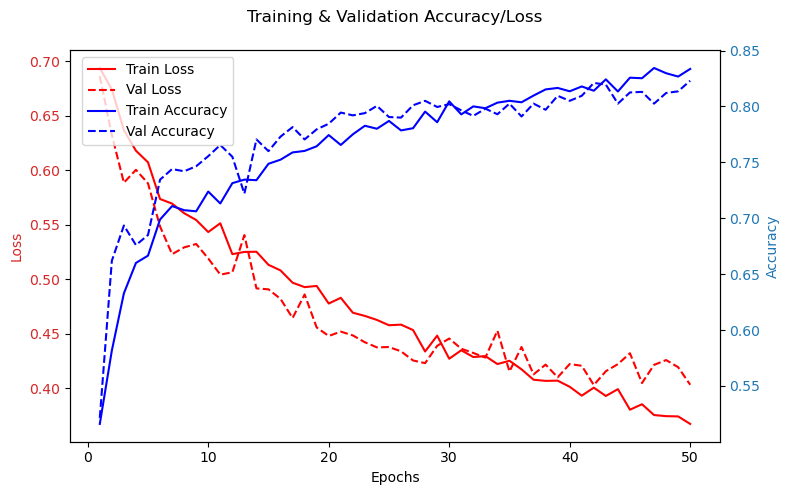

In [27]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(epochs, train_loss, 'r-', label="Train Loss")
ax1.plot(epochs, val_loss, 'r--', label="Val Loss")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(epochs, train_acc, 'b-', label="Train Accuracy")
ax2.plot(epochs, val_acc, 'b--', label="Val Accuracy")
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.suptitle('Training & Validation Accuracy/Loss')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()

In [28]:
loss, accuracy = cnn.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8300 - loss: 0.3890
Test Accuracy: 0.8301


## Prediction


1.


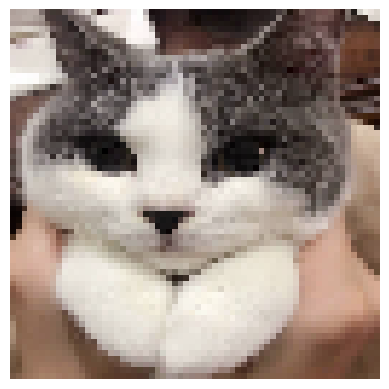

Prediction: cat

2.


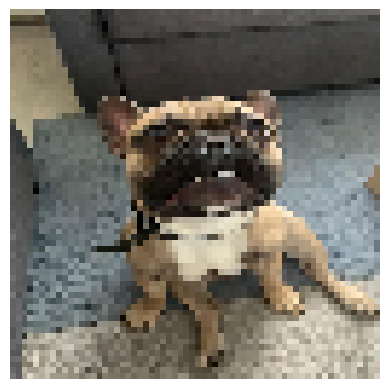

Prediction: dog

3.


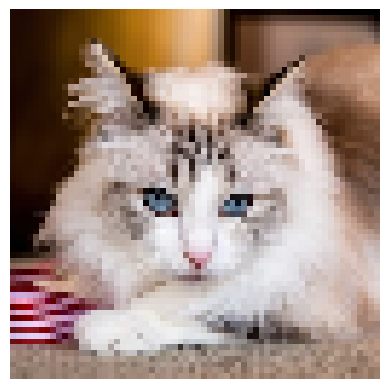

Prediction: cat

4.


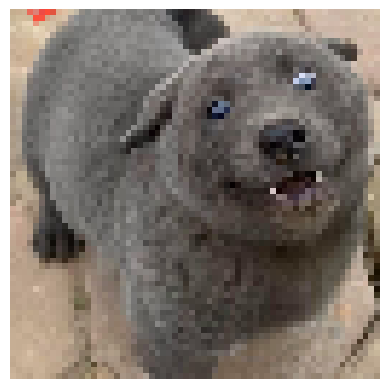

Prediction: dog

5.


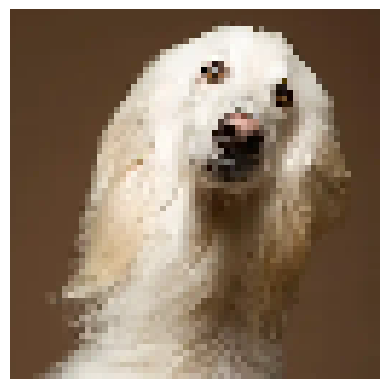

Prediction: dog


In [29]:
from tensorflow.keras.preprocessing import image

images = [
    image.load_img("./pic/pic_cat.png", target_size=(64, 64)),
    image.load_img("./pic/pic.png", target_size=(64, 64)),
    image.load_img("./pic/cat2.png", target_size=(64, 64)),
    image.load_img("./pic/dog2.png", target_size=(64, 64)),
    image.load_img("./pic/dog3.png", target_size=(64, 64))
]

for ind, img in zip(range(len(images)), images):
    print(f"\n{ind+1}.")
    plt.imshow(img)
    # prediction
    img_x = image.img_to_array(img)
    img_x = np.expand_dims(img_x, axis=0)
    result = cnn.predict(img_x, verbose=False)
    if result[0][0] <= 0.5:
        prediction = "cat"
    else:
        prediction = "dog"
        
    plt.axis("off")
    plt.show()
    
    print(f"Prediction: {prediction}")